# Self study 8

We continue with community detection, now looking at techniques based on matrix factorization. 

In [1]:
import numpy as np
import networkx as nx
import scipy as sp

In [2]:
zachary = nx.karate_club_graph()

The following functions return the adjacency and Laplacian matrix. It is converted to a dense (standard 2-dimensional array) representation, as required by subsequent SVD operations:

In [3]:
A=nx.linalg.graphmatrix.adjacency_matrix(zachary).todense()
L=nx.linalg.laplacianmatrix.laplacian_matrix(zachary).todense()

We obtain the singular value decomposition as follows:

In [9]:
SVD = np.linalg.svd(A)
LSVD = np.linalg.svd(L)

This returns a list of three matrices/arrays. The middle one represents the diagonal matrix of the SVD as a 1-dimensional array:

In [10]:
print(SVD[0].shape)
print(SVD[1].shape)
print(SVD[2].shape)

(34, 34)
(34,)
(34, 34)


**Task 3:** verify the following:
<ul>
    <li> all the elements of the diagonal matrix are non-negative (both when decomposing the adjacency or the Laplacian matrix)
    </li>
    <li>
        for the Laplacian matrix: the columns of SVD[0] are eigenvectors of the Laplacian with the corresponding eigenvalues from SVD[1]
    </li>
    </ul>


In [11]:
# Confirm that the diagonal matrix are non-negative
a = True
for e in SVD[1]:
    a &= e != 0
print(a)

a = True
for e in LSVD[1]:
    a &= e != 0
print(a)

True
True


In [39]:
# Confirm LSVD[0] are eigenvectors with LSVD[1] as eigenvalues
import math
result = True
for i in range(len(LSVD)):
    e_vec = np.asarray(LSVD[0][::, i]).flatten()
    e_val = LSVD[1][i]

    v1 = np.asarray(np.dot(L, e_vec)).flatten()
    v2 = np.dot(e_val, e_vec)
    equals = True
    for a, b in zip(v1, v2):
        equals &= math.isclose(a, b)
    result &= True
print(result)


True


**Task 4:** Plot the networks using different columns from SVD[0] to define x and y coordinates. For example, to use the first two columns, one can use the following (in order to keep us busy, Python and Networkx have decided that the draw function requires for the pos parameter an array; SVD[0][0:2] is a matrix, and won't do -- even if the shape is the same)

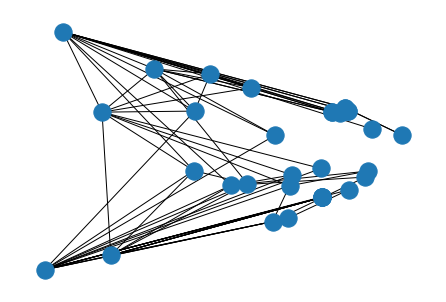

In [68]:
nx.draw(zachary,pos=np.asarray(SVD[0][:,0:2]))

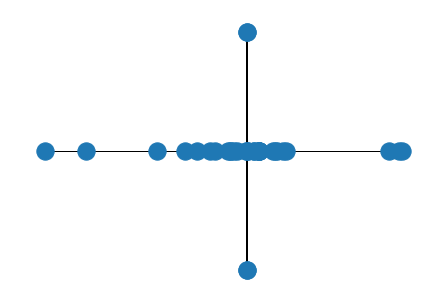

In [54]:
nx.draw(zachary,pos=np.asarray(SVD[0][:,8:10]))

5 0


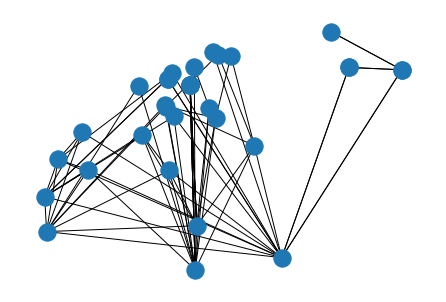

In [56]:
import random
x = random.randint(0,len(SVD[0])-1)
a = np.squeeze(np.asarray(SVD[0][:,x]))
y = random.randint(0,len(SVD[0])-1)
b = np.squeeze(np.asarray(SVD[0][:,y]))
c = np.asarray(list(zip(a,b)))
print(x,y)
nx.draw(zachary,pos=c)

29 31


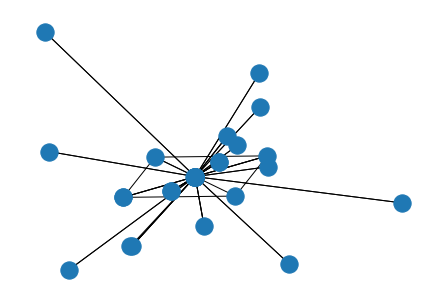

In [57]:
import random
x = random.randint(0,len(SVD[0])-1)
a = np.squeeze(np.asarray(SVD[0][:,x]))
y = random.randint(0,len(SVD[0])-1)
b = np.squeeze(np.asarray(SVD[0][:,y]))
c = np.asarray(list(zip(a,b)))
print(x,y)
nx.draw(zachary,pos=c)

Try to interpret the "meaning" of the node coefficients in the different columns of SVD[0]. 

**Task 5:** Construct some synthetic graphs with an inherent community structure, and investigate whether SVD for the adjacency and/or the Laplacian matrix will "discover" that structure.

**Task 6:** Try some bigger graphs. What's the largest size you can handle, so that SVD is computed within a few minutes at most?